For the given dataset perform the tasks below and write your observations. 

    (USA Housing dataset)
    a.	Perform EDA
    b.	Make plots
    c.	Evaluate the models using metrics
    d.	Make Predictions
    e.	Use variable selection to see change in metrics and write down interpretations.


In [102]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [141]:
df=pd.read_csv("USA_Housing.csv")

#### a. Perform EDA

In [142]:
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [144]:
df.shape

(5000, 7)

In [145]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [146]:
#### Since Address is of object datatype and has no revelent details to contribute for prediction, 
#### it can be dropped from the table.

df1=df.drop(['Address'],axis=1)
df1.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09     23086.800503  1.059034e+06  
1                          3.09     40173.072174  1.505891e+06  
2                          5.13     36882.159400  1.058988e+06  
3                          3.26     34310.242831  1.260617e+06  
4                          4.23     26354.109472  6.309435e+05

#### b. Make plots

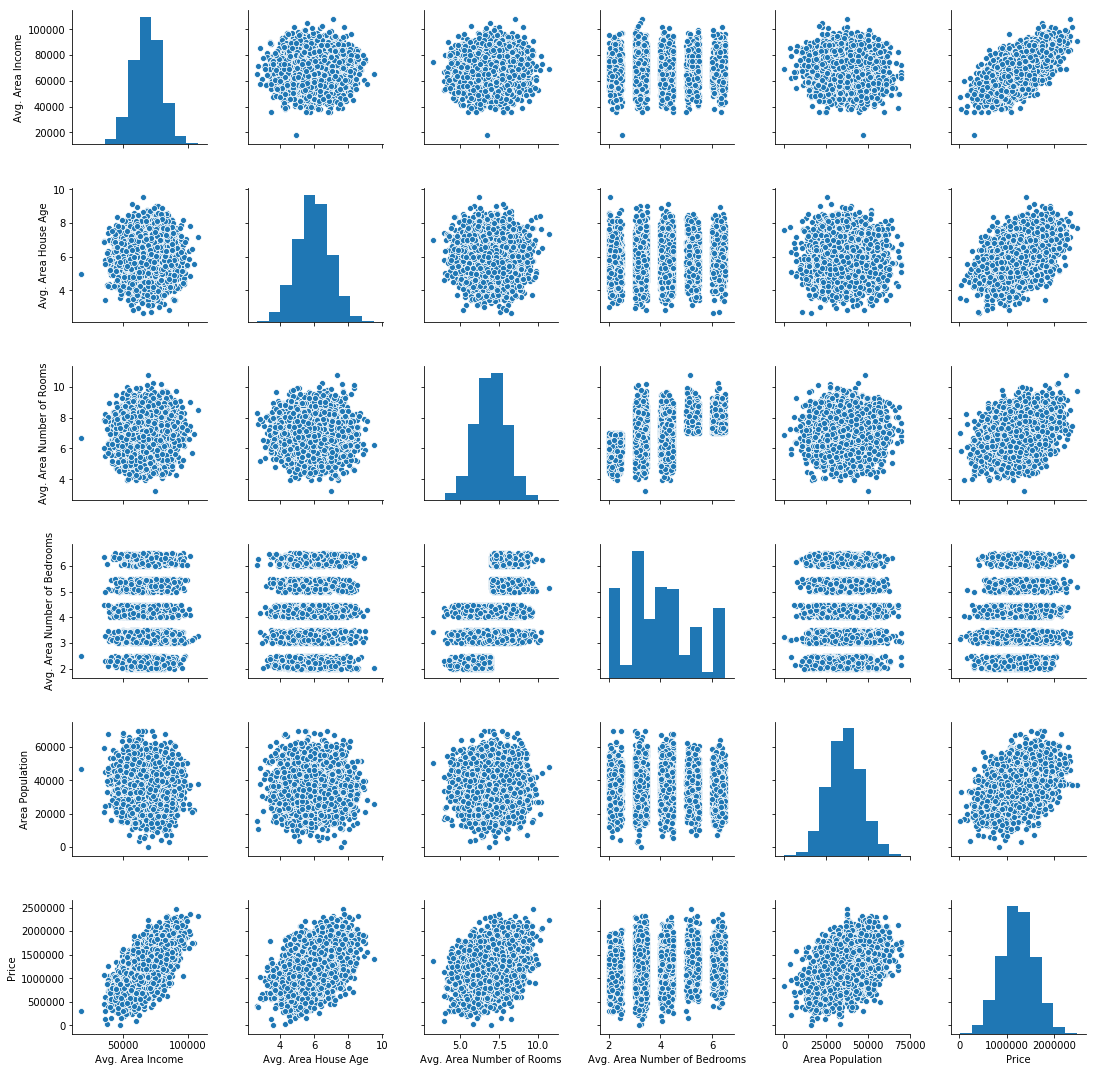

In [147]:
sns.pairplot(df1)

In [148]:
df1.corr()

Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area Income                                  0.019788        -0.016234   
Avg. Area House Age                               0.006149        -0.018743   
Avg. Area Number of Rooms                         0.462695         0.002040   
Avg. Area Number of Bedrooms                      1.000000        -0.022168   
Area Population                                  -0.022168         1.000000   
Price                                             0.171071         0.408556   

                                 Price  
Avg. Area Income              0.639734  
Avg. Area House Age           0.452543  
Avg. Area Number of Rooms     0.335664  
Avg. Area Number of Bedrooms  0.171071  
Area Population               0.408556  
Price                         1.000000

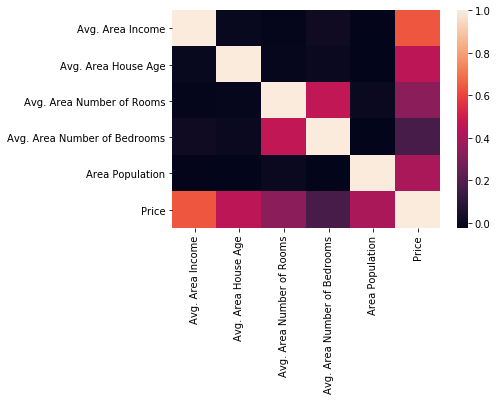

In [149]:
sns.heatmap(df1.corr())

#### c. Evaluate the models using metrics

In [112]:
x=df1.drop(['Price'],axis=1)
x=sm.add_constant(x)
y=df1.Price
print(x.head())
print(y.head())


   const  Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0    1.0      79545.458574             5.682861                   7.009188   
1    1.0      79248.642455             6.002900                   6.730821   
2    1.0      61287.067179             5.865890                   8.512727   
3    1.0      63345.240046             7.188236                   5.586729   
4    1.0      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population  
0                          4.09     23086.800503  
1                          3.09     40173.072174  
2                          5.13     36882.159400  
3                          3.26     34310.242831  
4                          4.23     26354.109472  
0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64


In [160]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [153]:
xtrain.shape

(3500, 6)

In [154]:
xtest.shape

(1500, 6)

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
lm=LinearRegression() #created the machine learning algo

#use the lm to train my dataset
lm.fit(xtrain,ytrain) # Model is fitted on the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [157]:
# Make predictions on the test data
pred = lm.predict(xtest)
pred

array([ 969608.34680629,  953868.15548656,  907506.32836106, ...,
       1423701.02109721,  744400.93315402,  488525.83117559])

In [158]:
# Finding R_squares value

from sklearn.metrics import r2_score
r2_score(y,lm.predict(x))

0.9180176399770642

In [124]:
intercept=lm.intercept_
print('Intercept:',intercept)

Intercept: -2644850.0694549102


In [125]:
lm.coef_

array([0.00000000e+00, 2.16645980e+01, 1.65789776e+05, 1.20587850e+05,
       1.43198844e+03, 1.52483144e+01])

    From the metrics calculated, it is found that the model is 91.8% accurate.
    The accuracy is good and could be considered as a better model.

#### d.	Make Predictions

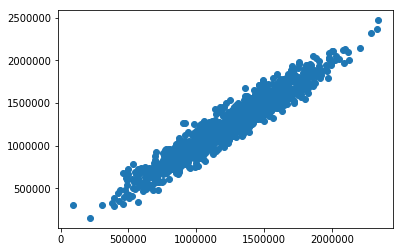

In [126]:
plt.scatter(lm.predict(xtest),ytest)
plt.show()

In [127]:
predict=pd.DataFrame(xtest)
predict['Actual Price']=ytest
predict['Predicted Price']=pred
predict.head()


const  Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
398     1.0      61200.726175             5.299694                   6.234615   
3833    1.0      63380.814670             5.344664                   6.001574   
4836    1.0      71208.269301             5.300326                   6.077989   
4572    1.0      50343.763518             6.027468                   5.160240   
636     1.0      54535.453719             5.278065                   6.871038   

      Avg. Area Number of Bedrooms  Area Population   Actual Price  \
398                           4.23     42789.692217  894251.068636   
3833                          2.45     40217.333577  932979.360621   
4836                          4.01     25696.361741  920747.911288   
4572                          4.35     27445.876739  691854.921027   
636                           4.41     30852.207006  732733.236293   

      Predicted Price  
398     970020.904752  
3833    954832.315674  
4836    907088.410898  
4572    492114.589473  
636     717010.716748

##### From the plot the predictions are found to be linear.

#### e.	Use variable selection to see change in metrics and write down interpretations.

In [128]:
model=sm.OLS(ytrain,xtrain)

In [129]:
result=model.fit()

In [130]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     8364.
Date:                Mon, 27 May 2019   Prob (F-statistic):               0.00
Time:                        12:38:21   Log-Likelihood:                -48524.
No. Observations:                3750   AIC:                         9.706e+04
Df Residuals:                    3744   BIC:                         9.710e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2.645e+06   1.99e+04   -132.876      0.000   -2.68e+06   -2.61e+06
Avg. Area Income                21.6646      0.155    140.118      0.000      21.361      21.968
Avg. Area House Age           1.658e+05   1654.834    100.185      0.000    1.63e+05    1.69e+05
Avg. Area Number of Rooms     1.206e+05   1840.404     65.522      0.000    1.17e+05    1.24e+05
Avg. Area Number of Bedrooms  1431.9884   1512.411      0.947      0.344   -1533.241    4397.218
Area Population                 15.2483      0.167     91.298      0.000      14.921      15.576
==============================================================================
Omnibus:                        6.651   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                5.910
Skew:                          -0.041   Prob(JB):                       0.0521
Kurtosis:                       2.824   Cond. No.                     9.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

    From the OLS summary, the features are found to possess multicollinearity.
    Also, considering the p-value, it is found that the feature 'Avg. Area Number of Bedrooms' has a value > 0.05.

In [131]:
# Checking multicollinearity by calculating VIF factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(1,x.shape[1]):
    VIF=variance_inflation_factor(x.values,i)
    print(VIF)

1.0011586896866724
1.0005765898148362
1.2735350882383392
1.2744127371946607
1.0012657972884669


    Since VIF values for all parameters are greater than 1 , it can be inferred that all features possess multicollinearity.
    But since it does not cross the threshold of VIF between 8 and 10, the features need not be neglected for prediction

##### Let us try removing 'Avg. Area Number of Bedrooms' feature since the p-value > 0.05

In [132]:
x1=x.drop(['Avg. Area Number of Bedrooms'],axis=1)
x1.head()
x1=sm.add_constant(x1)

In [133]:
from sklearn.model_selection import train_test_split
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y,test_size=0.25,random_state=0)

In [134]:
from sklearn.linear_model import LinearRegression

lm1=LinearRegression() #created the machine learning algo


In [135]:
#use the lm to train my dataset
lm1.fit(xtrain1,ytrain1) # Model is fitted on the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [136]:
# Make predictions on the test data
pred = lm1.predict(xtest1)
pred


array([ 968948.85877052,  956145.35724898,  906331.36681193, ...,
       1165876.40357556, 1444660.607895  , 1056974.36176184])

In [137]:
# Finding R_squares value

from sklearn.metrics import r2_score
r2_score(y,lm1.predict(x1))


0.9179872433729237

   * After dropping 'Avg. Area Number of Bedrooms' feature, ther is no significant change in R-square value. Hence, it is not really essential to remove this feature.

#### Inference:

    1. Features for Prediction (Variable selection): Except the Address feature, all other features have significant effect on the prediction of price.
    2. With those features, the linear regression model gives a R-squared value of 91.8%. 
   
       Thus, Regression model works well for the prediction of Price. The Actual and Predicted values are given below.

In [139]:
predict=pd.DataFrame(xtest)
predict['Actual Price']=ytest
predict['Predicted Price']=pred
predict.head(20)


const  Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
398     1.0      61200.726175             5.299694                   6.234615   
3833    1.0      63380.814670             5.344664                   6.001574   
4836    1.0      71208.269301             5.300326                   6.077989   
4572    1.0      50343.763518             6.027468                   5.160240   
636     1.0      54535.453719             5.278065                   6.871038   
2545    1.0      77459.757856             4.282450                   5.980079   
1161    1.0      44088.274183             7.557643                   5.581041   
2230    1.0      58874.273843             6.342055                   6.645742   
148     1.0      90975.113272             4.740683                   8.320352   
2530    1.0      77825.227469             6.720493                   7.425285   
4070    1.0      68953.483610             5.167995                   6.946763   
1261    1.0      74585.839799             4.492904                   5.736896   
4682    1.0      91935.366852             6.483291                   7.700597   
333     1.0      64160.815946             5.677609                   6.534960   
906     1.0      70472.792378             6.010154                   6.110192   
3170    1.0      54226.291306             5.370174                   7.505222   
483     1.0      72640.264047             4.441899                   7.906105   
2825    1.0      53288.003253             4.204037                   6.996336   
1778    1.0      76783.354658             6.102947                   6.328048   
2466    1.0      80228.599187             5.060031                   8.767014   

      Avg. Area Number of Bedrooms  Area Population  Actual Price  \
398                           4.23     42789.692217  8.942511e+05   
3833                          2.45     40217.333577  9.329794e+05   
4836                          4.01     25696.361741  9.207479e+05   
4572                          4.35     27445.876739  6.918549e+05   
636                           4.41     30852.207006  7.327332e+05   
2545                          4.48     37910.294982  9.452522e+05   
1161                          2.44     31032.920303  6.244828e+05   
2230                          2.11     19772.521662  8.495661e+05   
148                           6.45     44426.213648  1.544380e+06   
2530                          5.17     31439.971219  1.535262e+06   
4070                          2.10     13008.487295  5.688425e+05   
1261                          3.30     48051.647652  1.137523e+06   
4682                          4.37     50112.820224  2.092950e+06   
333                           4.05     32339.006278  9.857498e+05   
906                           3.24     34894.158826  1.265181e+06   
3170                          4.33     35596.824578  8.142403e+05   
483                           4.27     31470.617456  9.987740e+05   
2825                          3.22     48927.304434  8.105371e+05   
1778                          3.15     26703.718684  9.783127e+05   
2466                          3.29     27255.250819  1.535947e+06   

      Predicted Price  
398      9.689489e+05  
3833     9.561454e+05  
4836     9.063314e+05  
4572     4.900177e+05  
636      7.162015e+05  
2545     1.047338e+06  
1161     7.139406e+05  
2230     7.903933e+05  
148      1.799624e+06  
2530     1.536311e+06  
4070     7.475722e+05  
1261     1.145032e+06  
4682     2.120829e+06  
333      9.729030e+05  
906      1.152213e+06  
3170     8.740884e+05  
483      1.104973e+06  
2825     8.018380e+05  
1778     1.205940e+06  
2466     1.412156e+06